# CIS6800: Project 1a: Deep Learning Basics Part A

### Instructions:
* This is an individual assignment. Collaborating with others is not permitted.
* There is no single answer to most problems in deep learning, therefore the questions will often be underspecified. You need to fill in the blanks and submit a solution that solves the (practical) problem. Document the choices (hyperparameters, features, neural network architectures, etc.) you made where specified.
* All the code should be written in Python. You should only use PyTorch to complete this project.


### Setup

In [2]:
import torch
from torch import nn
import torchvision
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
rng_seed = 1144

# Download MNIST
torchvision.datasets.MNIST('.', download=True)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.48MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 161kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.51MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.89MB/s]


Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train

In [6]:
import random
import numpy as np

def set_seed(seed: int = 1144):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(1144)

def sigmoid_t(z: torch.Tensor) -> torch.Tensor:
    # Numerically stable-ish sigmoid
    return torch.sigmoid(z.clamp(-50, 50))

## Plot Loss and Gradient (20%)
In this part, you will write code to plot the output and gradient for a single neuron with
Sigmoid activation and two different loss functions. As shown in Figure 1, You should
implement a single neuron with input 1, and calculate different losses and corresponding
error.

<div><img src="https://github.com/LukasZhornyak/CIS680_files/raw/e676f49897a77eb8d1774057e8ea5a216f0dc273/HW1/images/fig1.png" width=1200/></div>

<center>Figure 1: Network diagram for part 1.</center>

All the figures plotted in this part should have the same range of x-axis and y-axis. The
range should be centered at 0 but the extend should be picked so as to see the difference
clearly.

A set of example plots are provided in Figure 2. Here we use ReLU (instead of Sigmoid)
activation and L2 loss as an example.

<div><img src="https://github.com/LukasZhornyak/CIS680_files/raw/e676f49897a77eb8d1774057e8ea5a216f0dc273/HW1/images/fig2.png" width=800/></div>

<center>Figure 2: Example plots with ReLU activation and L2 loss. Left: Output of ReLU function.
Middle: Loss plot with L2 loss. Right: Gradient plot.</center>

1. (3%) Plot a 3D figure showing the relations of output of Sigmoid function and weight/bias. To be specific, x-axis is weight, y-axis is bias, and z-axis is the out-put.

 Hint: Use the Python package matplotlib and the function plot surface from mpl toolkits.mplot3d
to draw 3D figures.

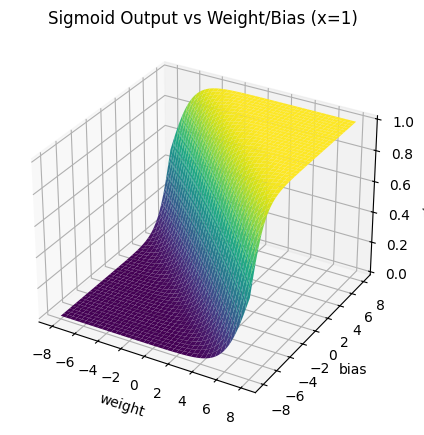

In [18]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# 1) Sigmoid output surface z = σ(w*1 + b)

def _mesh(wmin=-8.0, wmax=8.0, bmin=-8.0, bmax=8.0, steps=161):
    w_vals = np.linspace(wmin, wmax, steps)
    b_vals = np.linspace(bmin, bmax, steps)
    W, B = np.meshgrid(w_vals, b_vals)
    return W, B

W, B = _mesh()
Z = 1.0 / (1.0 + np.exp(-(W * 1.0 + B)))
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, Z, cmap='viridis', linewidth=0, antialiased=True)
ax.set_title('Sigmoid Output vs Weight/Bias (x=1)')
ax.set_xlabel('weight')
ax.set_ylabel('bias')
ax.set_zlabel('σ(wx+b)')
plt.show()

2. (3%) Experiment with L2 loss. The L2 loss is defined as $\mathcal{L}_{L2} = (\hat{y} - y)^2$, where $y$ is
the ground truth and $\hat{y}$ is the prediction. Let $y = 0.5$ and plot a 3D figure showing
2 the relations of L2 loss and weight/bias. To be specific, the x-axis is weight, y-axis is
bias, and z-axis is the L2 loss.

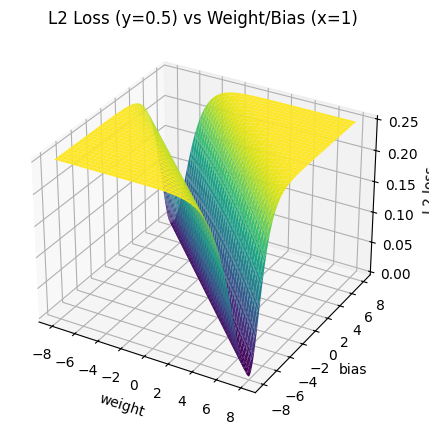

In [19]:
# 2) L2 loss surface (y=0.5)
y_true = 0.5
L2 = (Z - y_true) ** 2
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, L2, cmap='viridis', linewidth=0, antialiased=True)
ax.set_title('L2 Loss (y=0.5) vs Weight/Bias (x=1)')
ax.set_xlabel('weight')
ax.set_ylabel('bias')
ax.set_zlabel('L2 loss')
plt.show()

3. (4%) Experiment with back-propagation with L2 loss. Compute $\frac{\partial \mathcal{L}_{L2}}{\partial \text{weight}}$ and plot a 3D figure showing the relations of gradient and weight/bias. To be specific, the x-axis is weight, y-axis is bias, and z-axis is the gradient w.r.t. weight.

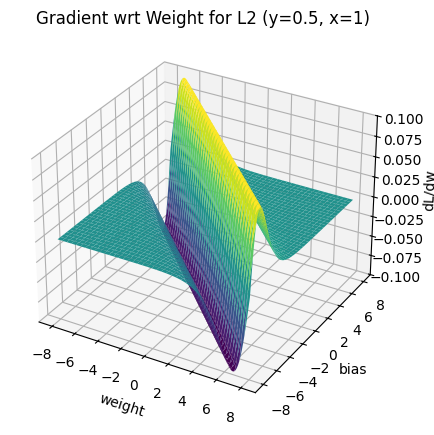

In [20]:
# 3) Gradient wrt weight for L2: dL/dw = 2*(yhat - y)*σ'(wx+b)*x, with x=1
sigp = Z * (1.0 - Z)
dL2_dw = 2.0 * (Z - y_true) * sigp
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, dL2_dw, cmap='viridis', linewidth=0, antialiased=True)
ax.set_title('Gradient wrt Weight for L2 (y=0.5, x=1)')
ax.set_xlabel('weight')
ax.set_ylabel('bias')
ax.set_zlabel('dL/dw')
plt.show()

4. (3%) Experiment with cross-entropy loss. The cross-entropy loss is defined as $\mathcal{L}_{CE} = -(y \log{\hat{y}} + (1 - y)\log{(1 - \hat{y})})$, where $y$ is the ground truth probability and $\hat{y}$ is the
predicted probability. Let $y = 0.5$ and plot a 3D figure showing the relations of
cross-entropy loss and weight/bias. To be specific, the x-axis is weight, y-axis is bias,
and z-axis is the cross-entropy loss.

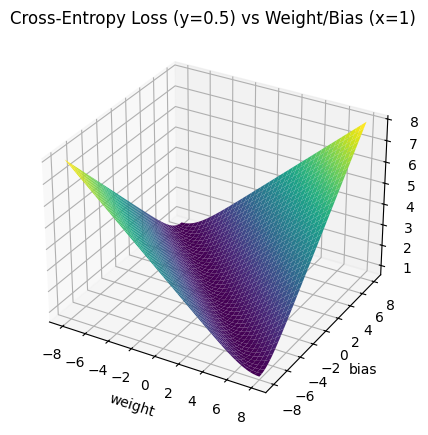

In [21]:
# 4) Cross-entropy loss (y=0.5)
eps = 1e-12
Zc = np.clip(Z, eps, 1.0 - eps)
CE = -(y_true * np.log(Zc) + (1.0 - y_true) * np.log(1.0 - Zc))
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, CE, cmap='viridis', linewidth=0, antialiased=True)
ax.set_title('Cross-Entropy Loss (y=0.5) vs Weight/Bias (x=1)')
ax.set_xlabel('weight')
ax.set_ylabel('bias')
ax.set_zlabel('CE loss')
plt.show()

5. (4%) Experiment with back-propagation with cross-entropy loss. Compute $\frac{\partial \mathcal{L}_{CE}}{\partial \text{weight}}$ and plot a 3D figure showing the relations of gradient and weight/bias. To be specific, the x-axis is weight, y-axis is bias, and z-axis is the gradient w.r.t. weight.

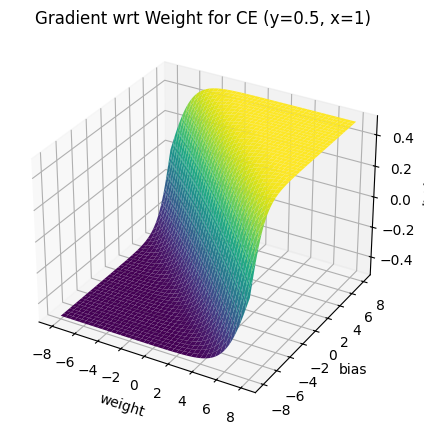

In [22]:
# 5) Gradient wrt weight for CE with sigmoid/logistic: dL/dw = (yhat - y)
dCE_dw = (Z - y_true)
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, dCE_dw, cmap='viridis', linewidth=0, antialiased=True)
ax.set_title('Gradient wrt Weight for CE (y=0.5, x=1)')
ax.set_xlabel('weight')
ax.set_ylabel('bias')
ax.set_zlabel('dL/dw')
plt.show()

6. (3%) Explain what you observed from the above 5 plots. The explanation should include:
 1. What's the difference between cross-entropy loss and L2 loss?
 2. What's the difference between the gradients from cross-entropy loss and L2 loss?
 3. Predict how these differences will influence the efficiency of learning.

Cross-entropy penalizes confident wrong predictions more strongly than L2 and, for logistic regression, yields gradients of the form (ŷ − y) without the extra σ'(z) factor. L2 multiplies by σ'(z), so its gradients vanish when the sigmoid saturates near 0 or 1. Therefore, CE typically provides stronger, more informative gradients and tends to learn faster and more stably for classification than L2.


## Solving XOR with a 2-layer Perceptron (20%)
In this question you are asked to build and visualize a 2-layer perceptron that computes
the XOR function. The network architecture is shown in Figure 3. The MLP has 1 hidden
layer with 2 neurons. The activation function used for the hidden layer is the hyperbolic
tangent function. Since we aim to model a boolean function the output of the last layer is
passed through a sigmoid activation function to constrain it between 0 and 1.

<div><img src="https://github.com/LukasZhornyak/CIS680_files/raw/e676f49897a77eb8d1774057e8ea5a216f0dc273/HW1/images/fig3.png" width=800/></div>

<center>Figure 3: Graphical representation of the 2-layer Perceptron</center>

1. (5%) Formulate the XOR approximation as an optimization problem using the cross
entropy loss. _Hint: Your dataset consists of just 4 points, $x_1 = (0,0)$, $x_2 = (0,1)$,
$x_3 = (1,0)$ and $x_4 = (1,1)$ with ground truth labels 0, 1, 1 and 0 respectively._

Minimize the average binary cross-entropy over the four samples for parameters θ = {W1, b1, W2, b2} of a 2-layer perceptron with tanh hidden and sigmoid output:

min_θ (1/4) · Σ_{i=1..4} [ −y_i log(σ(f(x_i; θ))) − (1 − y_i) log(1 − σ(f(x_i; θ))) ]

where f(x; θ) = W2 · tanh(W1 x + b1) + b2 and σ is the sigmoid.

2. (10%) Use gradient descent to learn the network weights that optimize the loss. Intuitively, the 2 layer perceptron first performs a nonlinear mapping from $(x_1,x_2) \rightarrow (h_1,h_2)$ and then learns a linear classifier in the $(h_1,h_2)$ plane.

 For different steps during training visualize the image of each input point $x_i$ in the $(h_1,h_2)$ plane as well as the decision boundary (separating line) of the classifier.

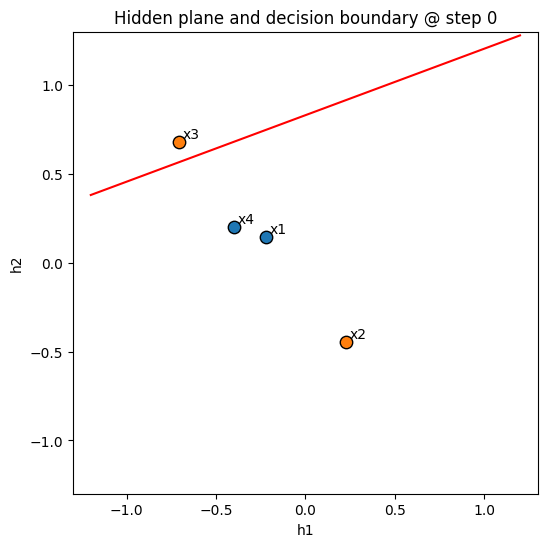

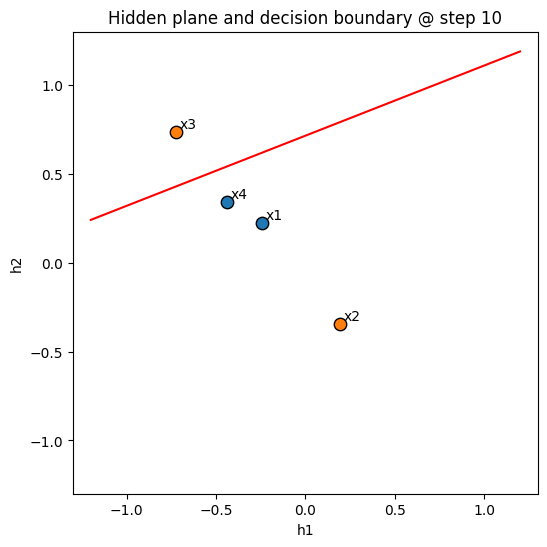

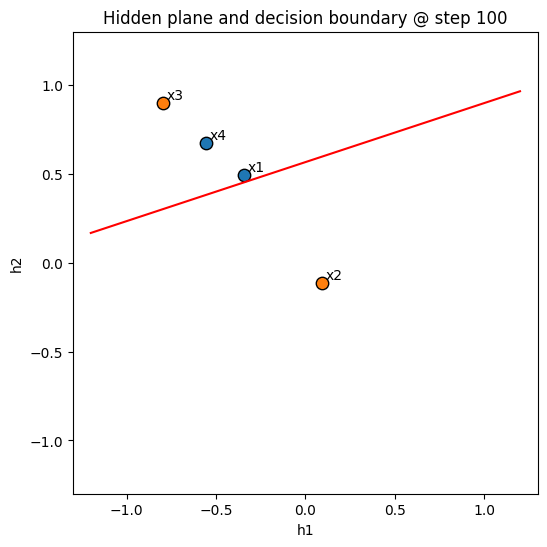

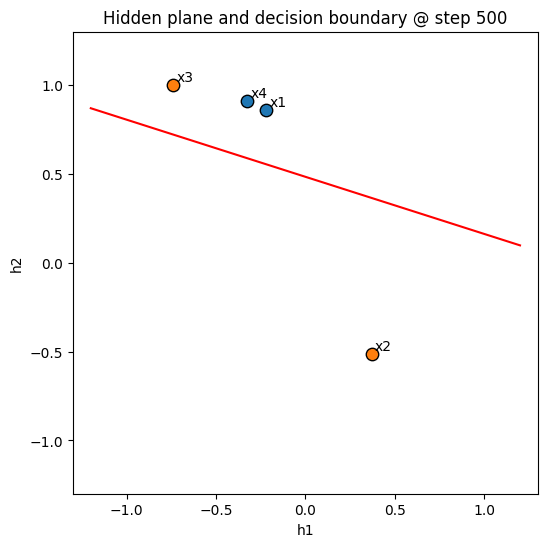

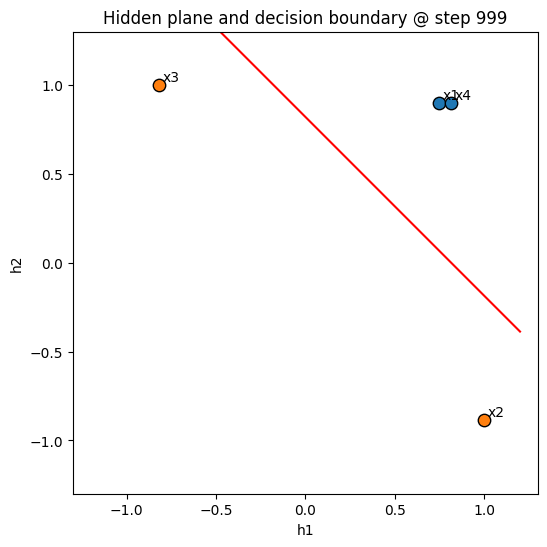

In [23]:
import numpy as np

# Make your dataset here
import torch
from torch import nn

data = torch.tensor([[0.0, 0.0],
                     [0.0, 1.0],
                     [1.0, 0.0],
                     [1.0, 1.0]], dtype=torch.float32)
labels = torch.tensor([[0.0], [1.0], [1.0], [0.0]], dtype=torch.float32)

# Make your network here
class XORMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 1)
        self.act = nn.Tanh()
    def forward(self, x):
        h = self.act(self.fc1(x))
        out = self.fc2(h)
        return out
    def hidden(self, x):
        return self.act(self.fc1(x))

network = XORMLP()
optimizer = torch.optim.SGD(network.parameters(), lr=0.1)
criterion = nn.BCEWithLogitsLoss()

# Train and plot here
for i in range(1000):
    optimizer.zero_grad()
    logits = network(data)
    loss = criterion(logits, labels)
    loss.backward()
    optimizer.step()

    if i in {0, 10, 100, 500, 999}:
        with torch.no_grad():
            H = network.hidden(data).numpy()
            w = network.fc2.weight.detach().numpy().reshape(-1)
            b = network.fc2.bias.detach().numpy().item()
        fig, ax = plt.subplots(figsize=(6,6))
        colors = ['tab:blue', 'tab:orange', 'tab:orange', 'tab:blue']
        for idx in range(4):
            ax.scatter(H[idx,0], H[idx,1], c=colors[idx], s=80, edgecolors='k')
            ax.text(H[idx,0]+0.02, H[idx,1]+0.02, f"x{idx+1}")
        h1_vals = np.linspace(-1.2, 1.2, 200)
        if abs(w[1]) > 1e-6:
            h2_vals = -(w[0]*h1_vals + b) / w[1]
            ax.plot(h1_vals, h2_vals, 'r-')
        else:
            if abs(w[0]) > 1e-6:
                ax.axvline(-b/w[0], color='r')
        ax.set_xlim([-1.3, 1.3])
        ax.set_ylim([-1.3, 1.3])
        ax.set_xlabel('h1')
        ax.set_ylabel('h2')
        ax.set_title(f'Hidden plane and decision boundary @ step {i}')
        plt.show()

3. (5%) What will happen if we don't use an activation function in the hidden layer? Is
the network be able to learn the XOR function? Justify your answer.

No. Without a non-linear activation in the hidden layer, the network is just one fat linear function... it's two linear layers that essentially collapse to a single linear map, so the model cannot represent XOR (which is not linearly separable).

## Train a Convolutional Neural Network (30%)
In this part you will be asked to train a convolutional neural network on the MNIST
dataset.

1. (10%) Build a Convolutional Neural Network with architecture as shown below:

| Layers | Hyper-parameters |
| :--- | :--- |
| Covolution 1 | Kernel size $= (5, 5, 32)$, SAME padding. Followed by BatchNorm and ReLU. |
| Pooling 1 | Average operation. Kernel size $= (2, 2)$. Stride $= 2$. Padding $= 0$. |
| Covolution 2 | Kernel size $= (5, 5, 32)$, SAME padding. Followed by BatchNorm and ReLU. |
| Pooling 2 | Average operation. Kernel size $= (2, 2)$. Stride $= 2$. Padding $= 0$. |
| Covolution 3 | Kernel size $= (5, 5, 64)$, SAME padding. Followed by BatchNorm and ReLU. |
| Pooling 3 | Average operation. Kernel size $= (2, 2)$. Stride $= 2$. Padding $= 0$. |
| Fully Connected 1 | Output channels $= 64$. Followed by BatchNorm and ReLU. |
| Fully Connected 2 | Output channels $= 10$. Followed by Softmax. |

In [24]:
# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

# Create your network here (do not change this name)
class DigitClassification(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=2)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=5, padding=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.bn3 = nn.BatchNorm2d(64)
        self.pool3 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 3 * 3, 64)
        self.bn_fc1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 10)
    def forward(self, x):
        x = self.pool1(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool2(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool3(torch.relu(self.bn3(self.conv3(x))))
        x = torch.flatten(x, 1)
        x = torch.relu(self.bn_fc1(self.fc1(x)))
        x = self.fc2(x)
        return x

# Instantiate your network here
model = DigitClassification().to(device)

2. (15%) Train the CNN on the MNIST dataset using the Cross Entropy loss. Report training and testing curves. Your model should reach $99\%$ accuracy on the
test dataset. (Hint: Normalize the images in the $(-1,1)$ range and use the Adam
optimizer).

Epoch 1/10
test acc: 0.9889
Epoch 2/10
test acc: 0.9902
Epoch 3/10
test acc: 0.9867
Epoch 4/10
test acc: 0.9872
Epoch 5/10
test acc: 0.9942
Epoch 6/10
test acc: 0.9933
Epoch 7/10
test acc: 0.9906
Epoch 8/10
test acc: 0.9941
Epoch 9/10
test acc: 0.9919
Epoch 10/10
test acc: 0.9927


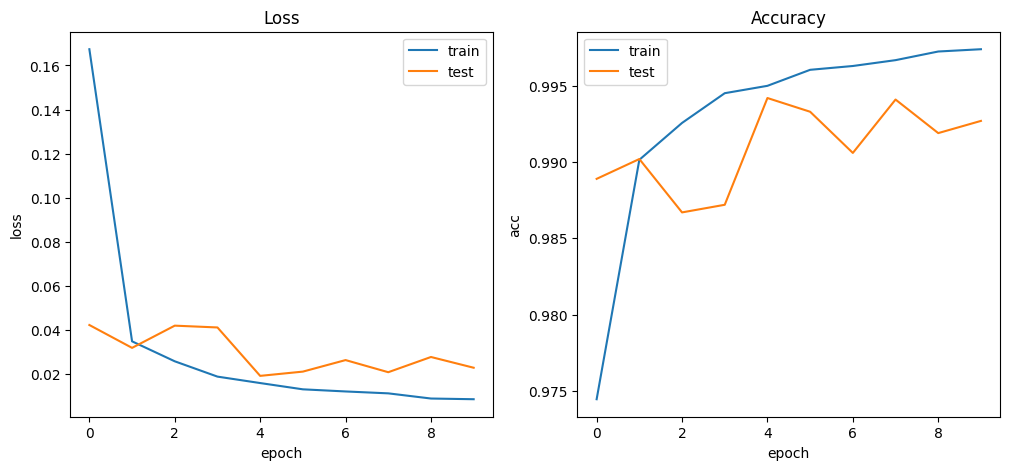

Saved model.pth


In [26]:
# Where your trained model will be saved (and where the autograder will load it)
model_path = 'model.pth'

# Dataloaders and optimizer
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5,))
])
train_ds = torchvision.datasets.MNIST('.', train=True, download=True, transform=transform)
test_ds = torchvision.datasets.MNIST('.', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=128, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=256, shuffle=False, num_workers=2)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

# Train your network here and record curves
num_epochs = 10
train_losses, test_losses, train_accs, test_accs = [], [], [], []
for epoch in range(num_epochs):
    print("Epoch %d/%d" % (epoch+1, num_epochs))
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        logits = model(images)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
        preds = torch.argmax(logits, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    train_losses.append(running_loss / total)
    train_accs.append(correct / total)

    # Eval
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            logits = model(images)
            loss = criterion(logits, labels)
            total_loss += loss.item() * images.size(0)
            preds = torch.argmax(logits, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    test_losses.append(total_loss / total)
    test_accs.append(correct / total)
    print(f"test acc: {test_accs[-1]:.4f}")

# Plot curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='train')
plt.plot(test_losses, label='test')
plt.title('Loss'); plt.xlabel('epoch'); plt.ylabel('loss'); plt.legend()
plt.subplot(1,2,2)
plt.plot(train_accs, label='train')
plt.plot(test_accs, label='test')
plt.title('Accuracy'); plt.xlabel('epoch'); plt.ylabel('acc'); plt.legend()
plt.show()

# Save model
torch.save(model.state_dict(), model_path)
print('Saved', model_path)

3. (5%) Report the training and testing curves and briefly summarise your implementation and training. Some things you may considering discussing, if appropriate:
 * Summarize your selection of hyperparameters.
 * Describe any issues or challenges you had with your implementation.
 * Note any interesting observations you made.
 * Justify any modifications or additions to the suggested architecture.
 * Do you think that the model overfit, underfit, or neither?

 You do not need to include all of these points and are free to discuss anything else you deem relevant.

Implementation: I used the specified Conv-BN-ReLU blocks with AvgPool (k=5, SAME padding) ×3, then FC→BN→ReLU→FC, trained with CrossEntropyLoss and Adam (lr=1e-3), batch size 128. Images were normalized to (−1, 1). The model outputs logits.

Curve Observations: Training loss decreases smoothly and accuracy rises to \~99.7%. Test accuracy surpasses 99% by epoch \~2 and stabilizes around \~99.2–99.4% with small oscillations; test loss fluctuates slightly but remains low. The small, stable generalization gap (\~0.3–0.5%) indicates no meaningful overfitting.

Notes: No data augmentation or dropout was needed to reach ≥99%. Further gains could come from short LR decay schedule, slightly longer training (or early stop once ≥99% is reached), and optional mild augmentation to tighten the gap. Overall, the architecture trains stably and meets the 99% requirement.

## Submission

Make sure you have run all cells in your notebook in order before you zip together your submission, so that all images/graphs appear in the output.

Your submission should include two files: this notebook and your trained model weights.

**Please save before exporting!**